# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### Q1) Is the distribution of body temperatures normal?

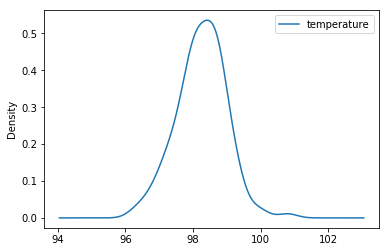

In [4]:
# Check for normal distribution
df['temperature'].plot(kind = 'density',legend = 'True')

In the case of temperatures, data seems to follow a normal distribution. 

### Q2) Is the sample size large? Are the observations independent?

In [5]:
#Check for Sample size
df.shape

(130, 3)

In [6]:
# Sample size 
sample_size = df.shape[0]
sample_size

130

In [7]:
#Sample statistics
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [8]:
# Proportion of males and females in the sample
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

### Q3) Is the true population mean really 98.6 degrees F?

#### Question:  Would you use a one-sample or two-sample test? Why?
     ANSWER:  - One-sample tests are used to compare a sample mean with the known population mean; In our case we will use a one-sample test to know if there is any signficant difference in population mean and sample mean.
             - Two-sample T-tests,on the other hand, are used to compare either independent samples or dependent samples;In our case we will use a two-sample test to see if there is any significant difference in the mean temperatures of Males and Females.
             - If sample value is smaller than the hypothesized value, the t-statistic will be negative. If it is larger, the t-statistic will be positive.
             
#### Question: In this situation, is it appropriate to use the  t or  z statistic?
    
    ANSWER:  - A T-test is appropriate when you are handling small samples (n < 30) while a Z-test is appropriate when  you are handling moderate to large samples (n > 30).However for larger samples both give similar result.
             - Z-tests are preferred than T-tests when standard deviations are known.Since standard deviation of population is unknown we cannot use a Z-Test.
    
         
         c. Now try using the other test. How is the result be different? Why?

In [9]:
df_temp= df['temperature']

#### Hypothesis testing for one-sample two-tail T-Test
    mean temperature of population = 98.6
    Alpha = 0.05
    
    Ho : mean temperature of sample = 98.6
    H1 : mean temperature of sample != 98.6
    
    A 2-tailed t-test will be used as the mean temperature could either be above or below 98.6
   

In [12]:
import numpy as np
import pandas as pd
from scipy import stats

In [14]:
population_mu = 98.6

onesample_results = stats.ttest_1samp(df_temp, population_mu)
onesample_results

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [15]:
t_stat = onesample_results[0]
t_stat

-5.4548232923645195

#### One-sample T-test Conclusion
    1)Since the p-value < 0.05 we can reject the null hypothesis. 
    2)The negative sign in t-statistic is an indication of direction; sample mean is lesser than the population mean 

### Q4) At what temperature should we consider someone's temperature to be "abnormal"?

In [17]:
# Margin of error for t-test = (sample variation /sqrt sample size)
import math
margin_error = (df_temp.std()/ math.sqrt(sample_size))
print("Margin of error is: ", margin_error,' or ', margin_error*100,"%")


Margin of error is:  0.06430441683789101  or  6.430441683789101 %


In [18]:
# At alpha 0.05 t_critical = 1.64
#Confidence interval [sample mean + (t_critical*margin_error) , sample mean - (t_critical*margin_error)]

conf_interval = [(df_temp.mean()-(1.64*margin_error)),(df_temp.mean()+(1.64*margin_error))]
print("Lower limit of Confidence interval is: ",conf_interval[0], 
      '\nUpper limit of Confidence Interval is: ',conf_interval[1])

Lower limit of Confidence interval is:  98.14377152561664 
Upper limit of Confidence Interval is:  98.35469001284491


#### Conclusion: Confidence Intervals
    With 95% confidence we can say that mean body tempertures should be between 98.14 and 98.35 to consider it to be normal. Anything outside this range is considered to be abnormal.

### Q4) Is there a significant difference between males and females in normal temperature?
    What test did you use and why?
            - Two-sample T-tests,on the other hand, are used to compare either independent samples or dependent  samples;In our case we will use a two-sample test to see if there is any significant difference in the mean temperatures of Males and Females.

#### Hypothesis testing for a 2 sampled t-test 
    Ho : Mean normal temperatures in males = Mean normal temperatures in Females
    H1 : Mean normal temperatures in males != Mean normal temperatures in Females

In [19]:
df_female = pd.DataFrame(df[df.gender =='F'].dropna())
df_male = pd.DataFrame(df[df.gender == 'M'].dropna())

In [20]:
df_female = df_female.temperature
df_male = df_male.temperature

In [22]:
twosample_results = stats.ttest_ind(df_male, df_female,equal_var=True)
twosample_results

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

#### Two-sample T-test Conclusion
     1. Since p-value < Alpha of 0.05, Ho is rejected.
     2. We can conclude that there is a statistically significant difference in the mean temperatures of females and males. 
     3. Also, since the t-statistic is negative it indicates that the mean temperatures of Males is less than that of Females. 